In [38]:
install.packages("readxl")
install.packages("dplyr")
install.packages("tidyxl")
install.packages("unpivotr")
install.packages("tensorflow")
install.packages("keras")
install.packages("reticulate")
install.packages("lubridate")
install.packages("tidyverse")
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [39]:
library(readxl)
library(dplyr)
library(lubridate)
library(readxl)
library(dplyr)
library(tidyxl)
library(unpivotr)
library(lubridate)

file_path <- "/content/KTE 2_Raw.xlsx" # Thay thế bằng đường dẫn tới file của bạn
raw_data <- read_excel(file_path, sheet = "Sheet1", skip = 9) # Thay thế "Sheet1" bằng tên sheet của bạn nếu cần

New names:
• `` -> `...1`
• `A` -> `A...5`
• `B` -> `B...6`
• `C` -> `C...7`
• `A` -> `A...8`
• `B` -> `B...9`
• `C` -> `C...10`
• `A` -> `A...11`
• `B` -> `B...12`
• `C` -> `C...13`
• `A` -> `A...14`
• `B` -> `B...15`
• `C` -> `C...16`
• `Tổng` -> `Tổng...17`
• `A` -> `A...18`
• `B` -> `B...19`
• `C` -> `C...20`
• `Tổng` -> `Tổng...21`
• `A` -> `A...22`
• `B` -> `B...23`
• `C` -> `C...24`
• `Tổng` -> `Tổng...25`
• `A` -> `A...26`
• `B` -> `B...27`
• `C` -> `C...28`
• `Tổng` -> `Tổng...29`
• `A` -> `A...30`
• `B` -> `B...31`
• `C` -> `C...32`
• `Tổng` -> `Tổng...33`
• `` -> `...34`
• `` -> `...35`
• `` -> `...36`
• `` -> `...37`


In [40]:
head(raw_data)

...1,Hệ thống,Công tơ,Thông tin,A...5,B...6,C...7,A...8,B...9,C...10,⋯,C...28,Tổng...29,A...30,B...31,C...32,Tổng...33,...34,...35,...36,...37
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<chr>
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,01/01/22 00:00,01/01/2022 00:01:00,Serial: ML31717088282 - ML3 - Meter NURI - TU: 1 - TI: 1 - HSN: 1,237.234,236.063,237.320,304.20,348.75,334.35,⋯,NA,NA,50.13,50.12,50.12,NA,811.59,230,560,020343
2,01/01/2022 00:30:00,-,Serial: - - - - TU: - - TI: - - HSN: -,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,-
3,01/01/22 01:00,01/01/2022 00:57:00,Serial: ML31717088282 - ML3 - Meter NURI - TU: 1 - TI: 1 - HSN: 1,234.406,233.089,234.427,279.60,297.90,286.05,⋯,NA,NA,50.10,50.10,50.10,NA,811.59,230,560,020343
4,01/01/22 01:30,01/01/2022 01:25:00,Serial: ML31717088282 - ML3 - Meter NURI - TU: 1 - TI: 1 - HSN: 1,235.978,234.657,235.904,260.25,270.30,277.05,⋯,NA,NA,50.02,50.02,50.02,NA,811.59,230,560,020343
5,01/01/22 02:00,01/01/2022 01:54:00,Serial: ML31717088282 - ML3 - Meter NURI - TU: 1 - TI: 1 - HSN: 1,233.935,232.942,234.020,294.00,279.30,287.85,⋯,NA,NA,49.99,49.99,49.99,NA,811.59,230,560,020343


In [41]:
cleaned_data <- raw_data %>%
  select(`Hệ thống`, `Điện áp (V) A` = A...5) %>%
  filter(!is.na(`Hệ thống`), !is.na(`Điện áp (V) A`)) %>%
  mutate(
    `Hệ thống` = dmy_hm(`Hệ thống`),
    `Điện áp (V) A` = as.numeric(`Điện áp (V) A`)
  ) %>%
  filter(!is.na(`Hệ thống`), !is.na(`Điện áp (V) A`))

cleaned_data$`Hệ thống` <- as.numeric(as.POSIXct(cleaned_data$`Hệ thống`, origin = "1970-01-01"))

str(cleaned_data)
head(cleaned_data)


tibble [25,277 × 2] (S3: tbl_df/tbl/data.frame)
 $ Hệ thống     : num [1:25277] 1.64e+09 1.64e+09 1.64e+09 1.64e+09 1.64e+09 ...
 $ Điện áp (V) A: num [1:25277] 237 234 236 234 235 ...


Hệ thống,Điện áp (V) A
<dbl>,<dbl>
1640995200,237.234
1640998800,234.406
1641000600,235.978
1641002400,233.935
1641004200,235.131
1641006000,235.016


In [42]:
summary(cleaned_data)

    Hệ thống         Điện áp (V) A  
 Min.   :1.641e+09   Min.   :226.5  
 1st Qu.:1.652e+09   1st Qu.:231.8  
 Median :1.664e+09   Median :233.0  
 Mean   :1.664e+09   Mean   :233.0  
 3rd Qu.:1.676e+09   3rd Qu.:234.1  
 Max.   :1.687e+09   Max.   :241.4  

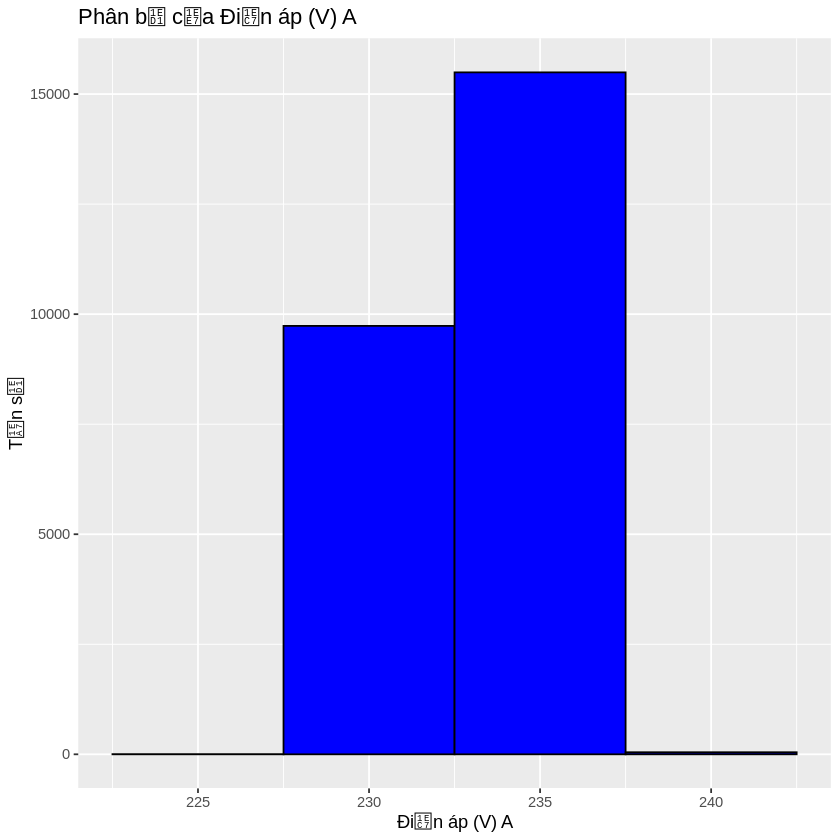

In [43]:
ggplot(cleaned_data, aes(x = `Điện áp (V) A`)) +
  geom_histogram(binwidth = 5, fill = "blue", color = "black") +
  labs(title = "Phân bố của Điện áp (V) A", x = "Điện áp (V) A", y = "Tần số")

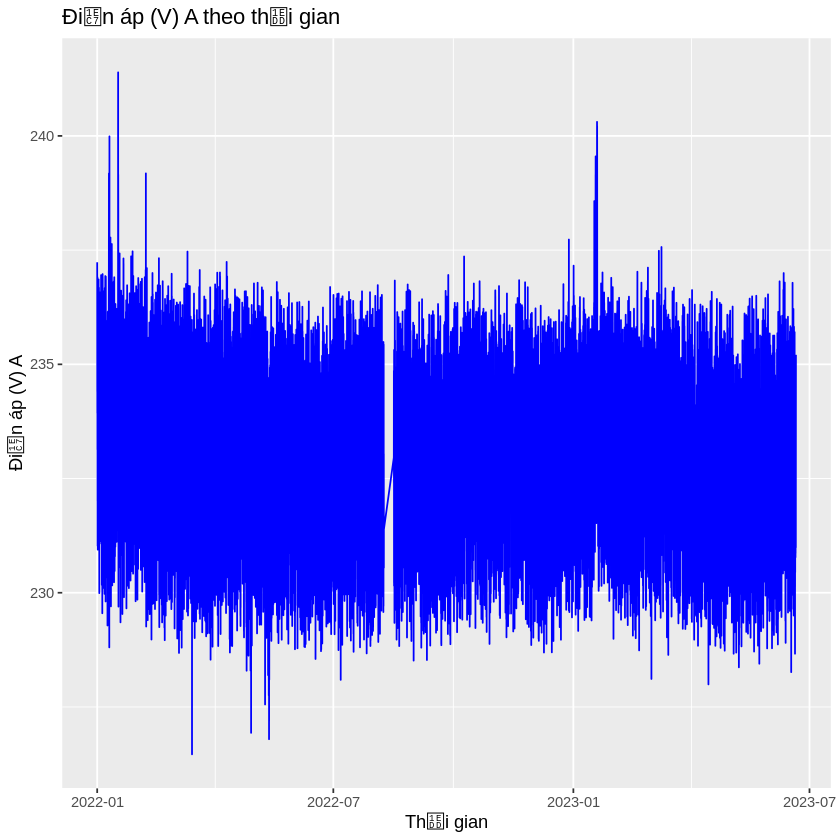

In [44]:
cleaned_data <- cleaned_data %>%
  mutate(`Hệ thống` = as.POSIXct(`Hệ thống`, origin = "1970-01-01"))

ggplot(cleaned_data, aes(x = `Hệ thống`, y = `Điện áp (V) A`)) +
  geom_line(color = "blue") +
  labs(title = "Điện áp (V) A theo thời gian", x = "Thời gian", y = "Điện áp (V) A")

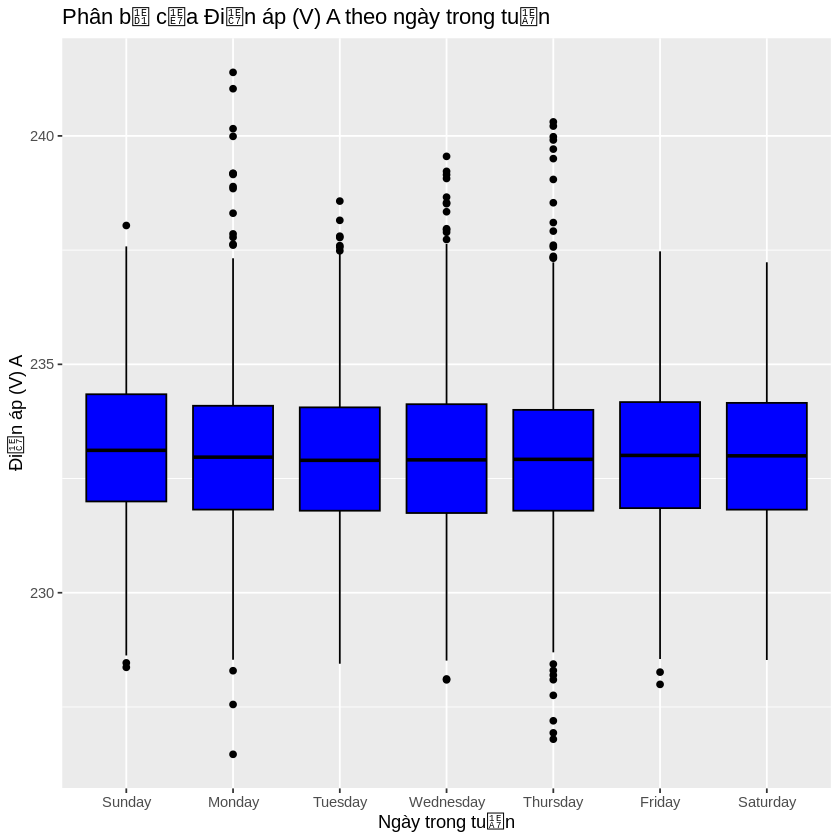

In [45]:
cleaned_data <- cleaned_data %>%
  mutate(day_of_week = wday(`Hệ thống`, label = TRUE, abbr = FALSE))

ggplot(cleaned_data, aes(x = day_of_week, y = `Điện áp (V) A`)) +
  geom_boxplot(fill = "blue", color = "black") +
  labs(title = "Phân bố của Điện áp (V) A theo ngày trong tuần", x = "Ngày trong tuần", y = "Điện áp (V) A")

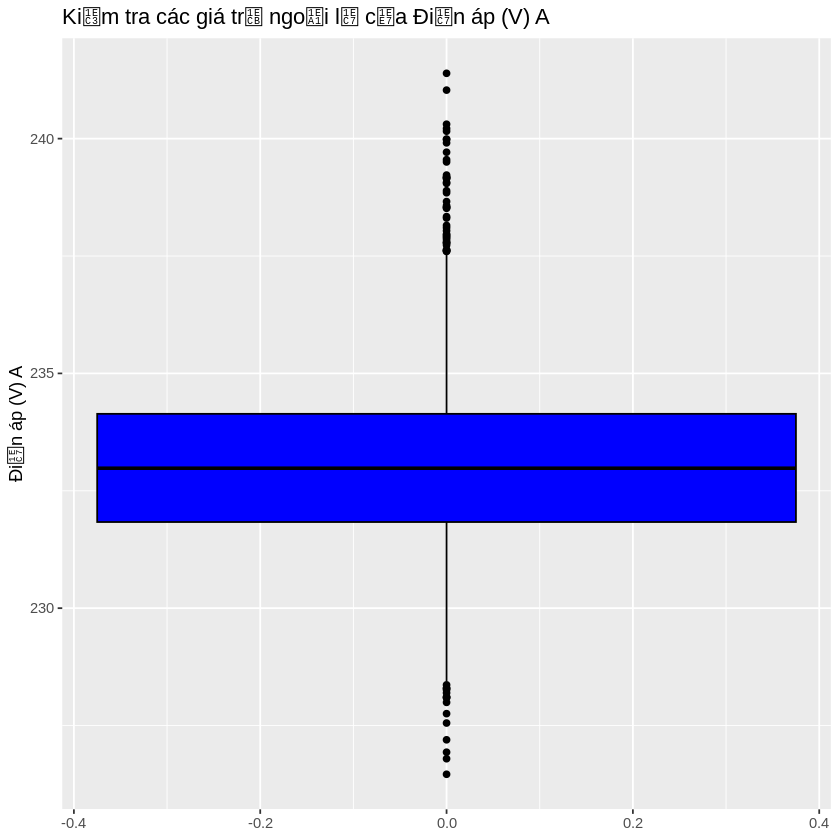

In [46]:
ggplot(cleaned_data, aes(y = `Điện áp (V) A`)) +
  geom_boxplot(fill = "blue", color = "black") +
  labs(title = "Kiểm tra các giá trị ngoại lệ của Điện áp (V) A", y = "Điện áp (V) A")

In [47]:
str(cleaned_data)

cleaned_data <- cleaned_data %>%
  mutate(
    `Hệ thống` = as.numeric(`Hệ thống`),
    `Điện áp (V) A` = as.numeric(`Điện áp (V) A`)
  )

tibble [25,277 × 3] (S3: tbl_df/tbl/data.frame)
 $ Hệ thống     : POSIXct[1:25277], format: "2022-01-01 00:00:00" "2022-01-01 01:00:00" ...
 $ Điện áp (V) A: num [1:25277] 237 234 236 234 235 ...
 $ day_of_week  : Ord.factor w/ 7 levels "Sunday"<"Monday"<..: 7 7 7 7 7 7 7 7 7 7 ...


In [48]:
install.packages("corrplot")
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [49]:
install.packages("GGally")
library(GGally)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



tibble [25,277 × 7] (S3: tbl_df/tbl/data.frame)
 $ Hệ thống       : num [1:25277] 1.64e+09 1.64e+09 1.64e+09 1.64e+09 1.64e+09 ...
 $ Điện áp (V) A  : num [1:25277] 237 234 236 234 235 ...
 $ Điện áp (V) B  : num [1:25277] 236 233 235 233 234 ...
 $ Điện áp (V) C  : num [1:25277] 237 234 236 234 235 ...
 $ Dòng điện (A) A: num [1:25277] 304 280 260 294 290 ...
 $ Dòng điện (A) B: num [1:25277] 349 298 270 279 258 ...
 $ Dòng điện (A) C: num [1:25277] 334 286 277 288 272 ...


Hệ thống,Điện áp (V) A,Điện áp (V) B,Điện áp (V) C,Dòng điện (A) A,Dòng điện (A) B,Dòng điện (A) C
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1640995200,237.234,236.063,237.320,304.20,348.75,334.35
1640998800,234.406,233.089,234.427,279.60,297.90,286.05
1641000600,235.978,234.657,235.904,260.25,270.30,277.05
1641002400,233.935,232.942,234.020,294.00,279.30,287.85
1641004200,235.131,234.100,235.129,290.25,257.55,272.25
1641006000,235.016,234.037,234.939,275.10,248.85,287.85


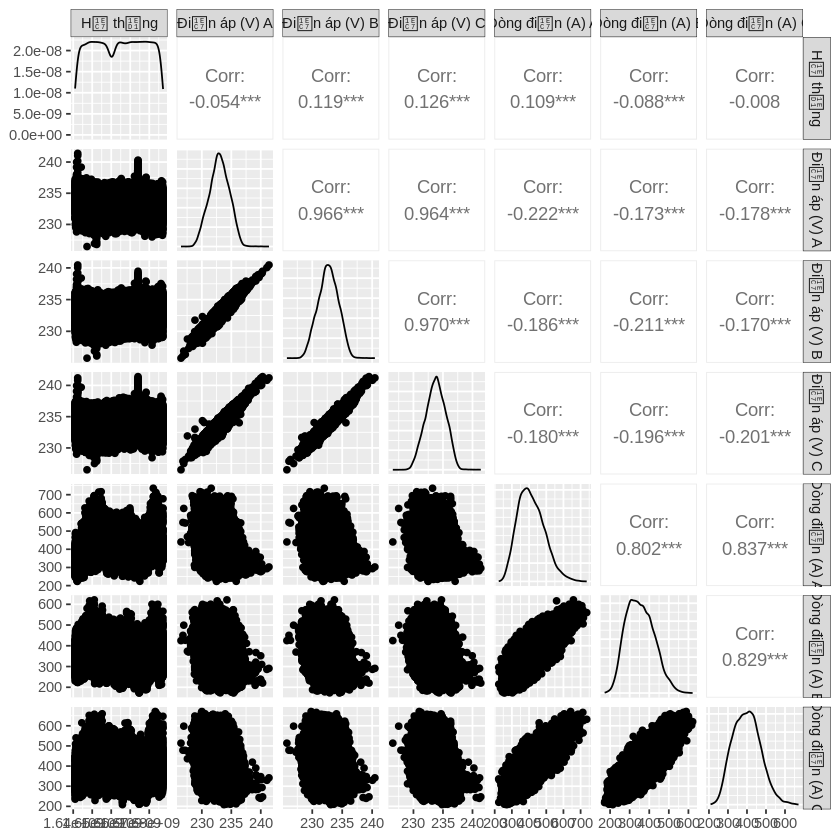

In [50]:
test_cleaned_data <- raw_data %>%
  select(`Hệ thống`, `Điện áp (V) A` = A...5, `Điện áp (V) B` = B...6, `Điện áp (V) C` = C...7,
         `Dòng điện (A) A` = A...8, `Dòng điện (A) B` = B...9, `Dòng điện (A) C` = C...10) %>%
  filter(!is.na(`Hệ thống`), !is.na(`Điện áp (V) A`), !is.na(`Điện áp (V) B`), !is.na(`Điện áp (V) C`),
         !is.na(`Dòng điện (A) A`), !is.na(`Dòng điện (A) B`), !is.na(`Dòng điện (A) C`)) %>%
  mutate(
    `Hệ thống` = dmy_hm(`Hệ thống`),
    across(starts_with("Điện áp (V)"), as.numeric),
    across(starts_with("Dòng điện (A)"), as.numeric)
  ) %>%
  filter(!is.na(`Hệ thống`), !is.na(`Điện áp (V) A`), !is.na(`Điện áp (V) B`), !is.na(`Điện áp (V) C`),
         !is.na(`Dòng điện (A) A`), !is.na(`Dòng điện (A) B`), !is.na(`Dòng điện (A) C`))

test_cleaned_data$`Hệ thống` <- as.numeric(as.POSIXct(cleaned_data$`Hệ thống`, origin = "1970-01-01"))

str(test_cleaned_data)
head(test_cleaned_data)

ggpairs(test_cleaned_data)

In [51]:
cleaned_data <- cleaned_data %>%
  mutate(
    day_of_week = wday(as.POSIXct(cleaned_data$`Hệ thống`, origin = "1970-01-01"), label = TRUE, abbr = FALSE)
  )

clusters <- list(
  c("Monday", "Tuesday", "Wednesday", "Sunday"),
  c("Thursday", "Friday", "Saturday"),
  c("Monday", "Wednesday", "Friday", "Sunday"),
  c("Tuesday", "Thursday", "Saturday")
)

assign_cluster <- function(day) {
  for (i in 1:length(clusters)) {
    if (day %in% clusters[[i]]) {
      return(i)
    }
  }
  return(NA)
}

cleaned_data <- cleaned_data %>%
  mutate(cluster = sapply(day_of_week, assign_cluster))

head(cleaned_data)

Hệ thống,Điện áp (V) A,day_of_week,cluster
<dbl>,<dbl>,<ord>,<int>
1640995200,237.234,Saturday,2
1640998800,234.406,Saturday,2
1641000600,235.978,Saturday,2
1641002400,233.935,Saturday,2
1641004200,235.131,Saturday,2
1641006000,235.016,Saturday,2


In [52]:
max_value <- max(cleaned_data$`Điện áp (V) A`, na.rm = TRUE)

max_row <- cleaned_data %>%
  filter(`Điện áp (V) A` == max_value)

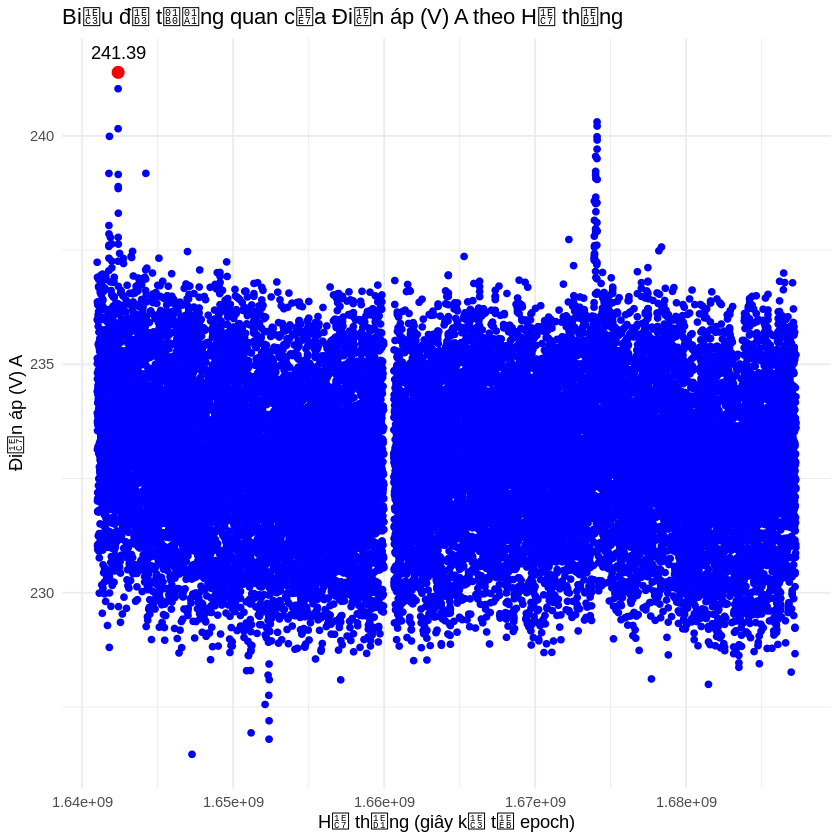

In [53]:
ggplot(cleaned_data, aes(x = `Hệ thống`, y = `Điện áp (V) A`)) +
  geom_point(color = "blue") +
  geom_point(data = max_row, aes(x = `Hệ thống`, y = `Điện áp (V) A`), color = "red", size = 3) +
  geom_text(data = max_row, aes(x = `Hệ thống`, y = `Điện áp (V) A`, label = round(`Điện áp (V) A`, 2)), vjust = -1) +
  labs(title = "Biểu đồ tương quan của Điện áp (V) A theo Hệ thống",
       x = "Hệ thống (giây kể từ epoch)",
       y = "Điện áp (V) A") +
  theme_minimal()

In [54]:
library(tensorflow)
library(keras)

In [61]:
create_model <- function(layer1_units, layer2_units) {
  model <- keras_model_sequential() %>%
    layer_dense(units = layer1_units, activation = 'relu', input_shape = 1) %>%
    layer_dense(units = layer2_units, activation = 'relu') %>%
    layer_dense(units = 1)

  model %>% compile(
    optimizer = 'adam',
    loss = 'mean_squared_error',
    metrics = c('mean_absolute_error')
  )

  return(model)
}

k_fold_cross_validation <- function(data, k = 1) {
  folds <- split(data, data$cluster)
  scores <- data.frame(mse = numeric(), mae = numeric(), accuracy = numeric())

  for (i in 1:k) {
    cat("Fold:", i, "\n")
    test_data <- folds[[i]]
    train_data <- do.call("rbind", folds[-i])

    model <- create_model(64, 64)

    model %>% fit(
      as.matrix(train_data[, "Hệ thống"]),
      train_data$`Điện áp (V) A`,
      epochs = 50,
      validation_split = 0.2,
      verbose = 1
    )

    predictions <- model %>% predict(as.matrix(test_data[, "Hệ thống"]))
    actuals <- test_data$`Điện áp (V) A`
    mse <- mean((predictions - actuals)^2)
    mae <- mean(abs(predictions - actuals))
    accuracy <- calculate_accuracy(predictions, actuals, threshold = 5)

    scores <- rbind(scores, data.frame(mse = mse, mae = mae, accuracy = accuracy))
  }

  return(list(scores = scores, folds = folds))
}

calculate_accuracy <- function(predictions, actuals, threshold) {
  correct_predictions <- sum(abs(predictions - actuals) <= threshold)
  total_predictions <- length(predictions)
  accuracy <- correct_predictions / total_predictions
  return(accuracy)
}

cv_results <- k_fold_cross_validation(cleaned_data, k = 1)
print(cv_results$scores)

Fold: 1 
       mse      mae accuracy
1 82.18262 7.219386 0.420354
